In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data_cleaned/merged_data.csv')

In [3]:
df

,Unnamed: 0,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,...,imdb_id,original_language,popularity,genres,production_companies,production_countries,spoken_languages,film_oscar_nominee,company_nominated,license
0,0,299534,Avengers: Endgame,8.263,23857,Released,2019-04-24,2800000000,181,False,...,tt4154796,en,91.756,Adventure,Marvel Studios,United States of America,"English, Japanese, Xhosa",1.0,0,PG-13
1,1,475557,Joker,8.168,23425,Released,2019-10-01,1074458282,122,False,...,tt7286456,en,54.522,Crime,"Warner Bros. Pictures, Joint Effort, Village R...","Canada, United States of America",English,1.0,1,R
2,2,634649,Spider-Man: No Way Home,7.990,18299,Released,2021-12-15,1921847111,148,False,...,tt10872600,en,186.065,Action,"Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog",1.0,0,PG-13
3,3,299537,Captain Marvel,6.843,14657,Released,2019-03-06,1131416446,124,False,...,tt4154664,en,50.399,Action,Marvel Studios,United States of America,English,0.0,0,PG-13
4,4,429617,Spider-Man: Far From Home,7.447,14495,Released,2019-06-28,1131927996,129,False,...,tt6320628,en,49.913,Action,"Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"Czech, Dutch, English, German, Italian",0.0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,647,884184,Consecration,5.825,105,Released,2023-02-09,1504289,90,False,...,tt14993352,en,48.774,Horror,"AGC Studios, Bigscope Films, Moonriver Content","United Kingdom, United States of America",English,0.0,0,unknown
637,648,893086,The Good Neighbor,6.952,105,Released,2022-06-17,94909,97,False,...,tt14349032,en,13.842,Thriller,"Forma Pro Films, Altit Media Group","United States of America, Latvia",English,0.0,0,unknown
638,649,639247,Dreamkatcher,5.231,104,Released,2020-06-24,375836,85,False,...,tt10553210,en,7.720,Horror,Taylor Lane Productions,United States of America,English,0.0,0,unknown
639,650,727097,Archenemy,5.306,103,Released,2020-11-30,136240,90,False,...,tt11274100,en,8.290,Action,"SpectreVision, Legion M, RLJ Entertainment, He...",United States of America,English,0.0,0,unknown


## Correlation between categorical columns

In [4]:
df['film_oscar_nominee'] = df['film_oscar_nominee'].astype('category')
df['company_nominated'] = df['company_nominated'].astype('category')

In [5]:
categorical_columns = df.select_dtypes(include=['object', 'category'])

In [6]:
def keep_first_word(string):
    return string.split(',')[0]
categorical_columns['production_companies'] = categorical_columns['production_companies'].apply(keep_first_word)

In [7]:
#columns, we don't need for the analysis. 'company_nominated' is created for subset of data where 'release_date' is 2022
columns_to_drop = ['status', 'imdb_id', 'original_language', 'production_countries', 'spoken_languages', 'company_nominated']
categorical_columns = categorical_columns.drop(columns=columns_to_drop)

In [8]:
categorical_columns.head()

,title,release_date,genres,production_companies,film_oscar_nominee,license
0,Avengers: Endgame,2019-04-24,Adventure,Marvel Studios,1.0,PG-13
1,Joker,2019-10-01,Crime,Warner Bros. Pictures,1.0,R
2,Spider-Man: No Way Home,2021-12-15,Action,Marvel Studios,1.0,PG-13
3,Captain Marvel,2019-03-06,Action,Marvel Studios,0.0,PG-13
4,Spider-Man: Far From Home,2019-06-28,Action,Marvel Studios,0.0,unknown


In [9]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(categorical_columns['genres'], categorical_columns['film_oscar_nominee'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value.round(2)}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 76.15184368048355
P-value: 0.0
Degrees of Freedom: 17
Expected Frequencies:
[[ 97.32293292  14.67706708]
 [ 13.03432137   1.96567863]
 [ 29.54446178   4.45553822]
 [ 65.17160686   9.82839314]
 [ 14.77223089   2.22776911]
 [  6.95163807   1.04836193]
 [107.75039002  16.24960998]
 [ 19.11700468   2.88299532]
 [ 12.16536661   1.83463339]
 [  4.34477379   0.65522621]
 [ 79.94383775  12.05616225]
 [  4.34477379   0.65522621]
 [  6.08268331   0.91731669]
 [ 16.51014041   2.48985959]
 [ 24.33073323   3.66926677]
 [ 47.7925117    7.2074883 ]
 [  6.08268331   0.91731669]
 [  1.73790952   0.26209048]]


####
The Chi-Square Statistic is relatively large (76.1576.15), indicating a significant difference between the observed and expected frequencies.
The extremely small p-value (1.83×10−91.83×10−9) is well below the typical significance level of 0.05. This suggests strong evidence against the null hypothesis of no association between the two categorical variables.

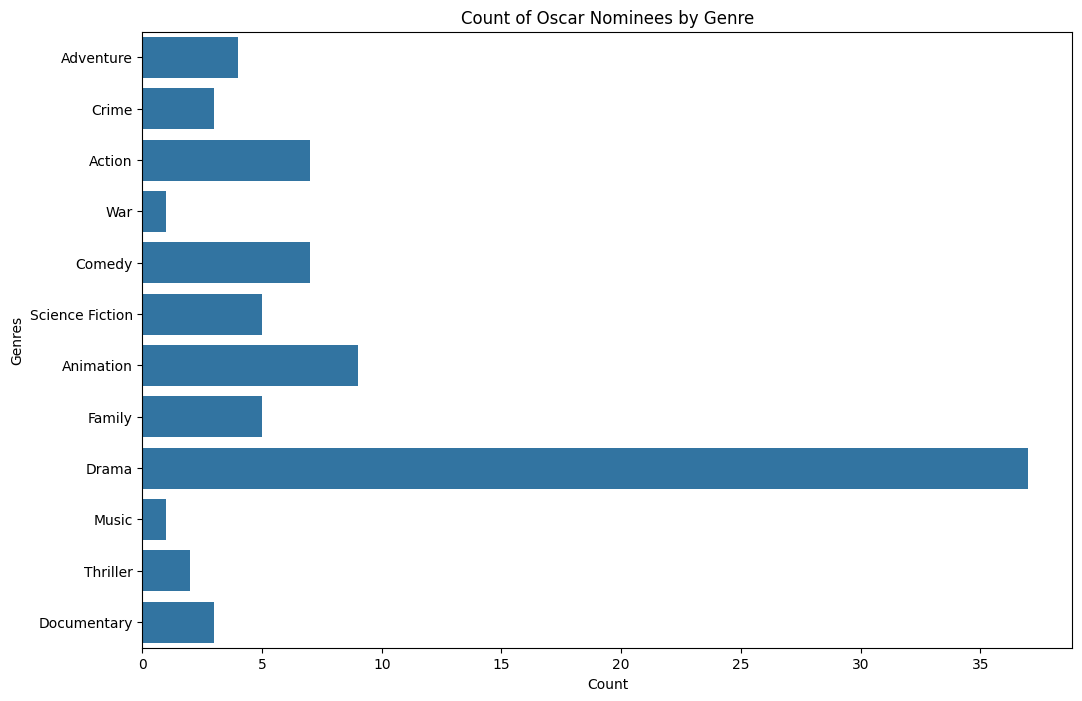

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(y='genres', data=categorical_columns[categorical_columns['film_oscar_nominee'] == 1])
plt.title('Count of Oscar Nominees by Genre')
plt.ylabel('Genres')
plt.xlabel('Count')
plt.show()

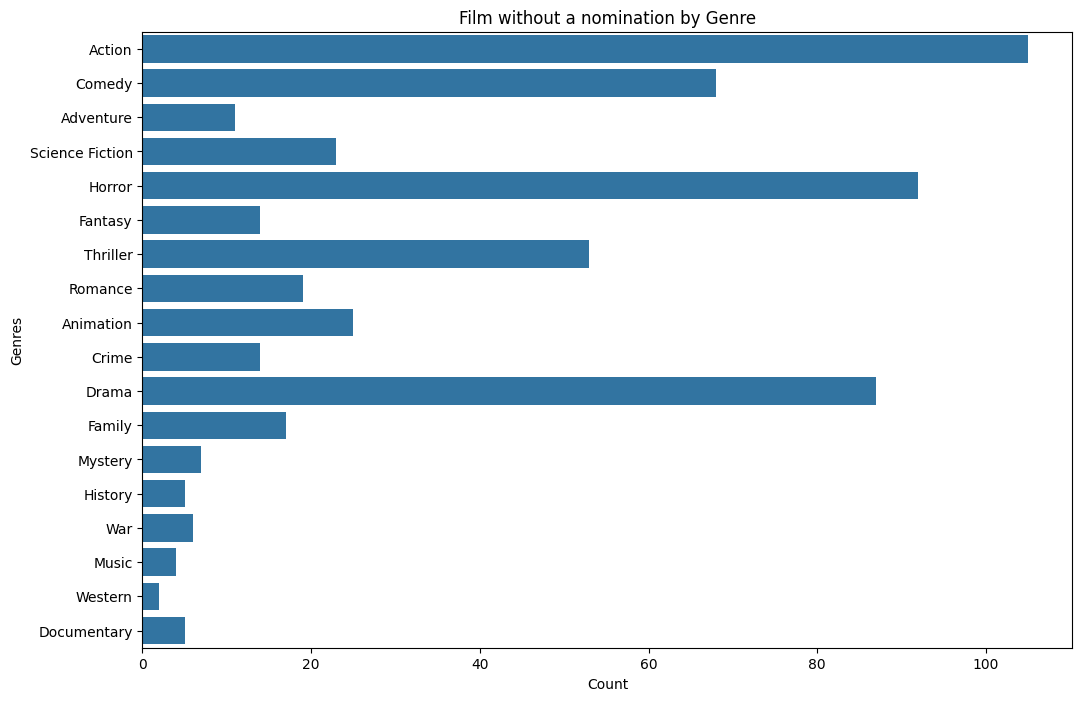

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(y='genres', data=categorical_columns[categorical_columns['film_oscar_nominee'] == 0])
plt.title('Film without a nomination by Genre')
plt.ylabel('Genres')
plt.xlabel('Count')
plt.show()

In [12]:
from scipy.stats import chi2_contingency

contingency_table2 = pd.crosstab(categorical_columns['genres'], categorical_columns['license'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table2)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value.round(2)}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 187.36298346419326
P-value: 0.0
Degrees of Freedom: 68
Expected Frequencies:
[[3.49453978e-01 4.19344774e+00 8.73634945e+00 3.49453978e+00
  9.52262090e+01]
 [4.68018721e-02 5.61622465e-01 1.17004680e+00 4.68018721e-01
  1.27535101e+01]
 [1.06084243e-01 1.27301092e+00 2.65210608e+00 1.06084243e+00
  2.89079563e+01]
 [2.34009360e-01 2.80811232e+00 5.85023401e+00 2.34009360e+00
  6.37675507e+01]
 [5.30421217e-02 6.36505460e-01 1.32605304e+00 5.30421217e-01
  1.44539782e+01]
 [2.49609984e-02 2.99531981e-01 6.24024961e-01 2.49609984e-01
  6.80187207e+00]
 [3.86895476e-01 4.64274571e+00 9.67238690e+00 3.86895476e+00
  1.05429017e+02]
 [6.86427457e-02 8.23712949e-01 1.71606864e+00 6.86427457e-01
  1.87051482e+01]
 [4.36817473e-02 5.24180967e-01 1.09204368e+00 4.36817473e-01
  1.19032761e+01]
 [1.56006240e-02 1.87207488e-01 3.90015601e-01 1.56006240e-01
  4.25117005e+00]
 [2.87051482e-01 3.44461778e+00 7.17628705e+00 2.87051482e+00
  7.82215289e+01]
 [1.56006240e-02 1.87

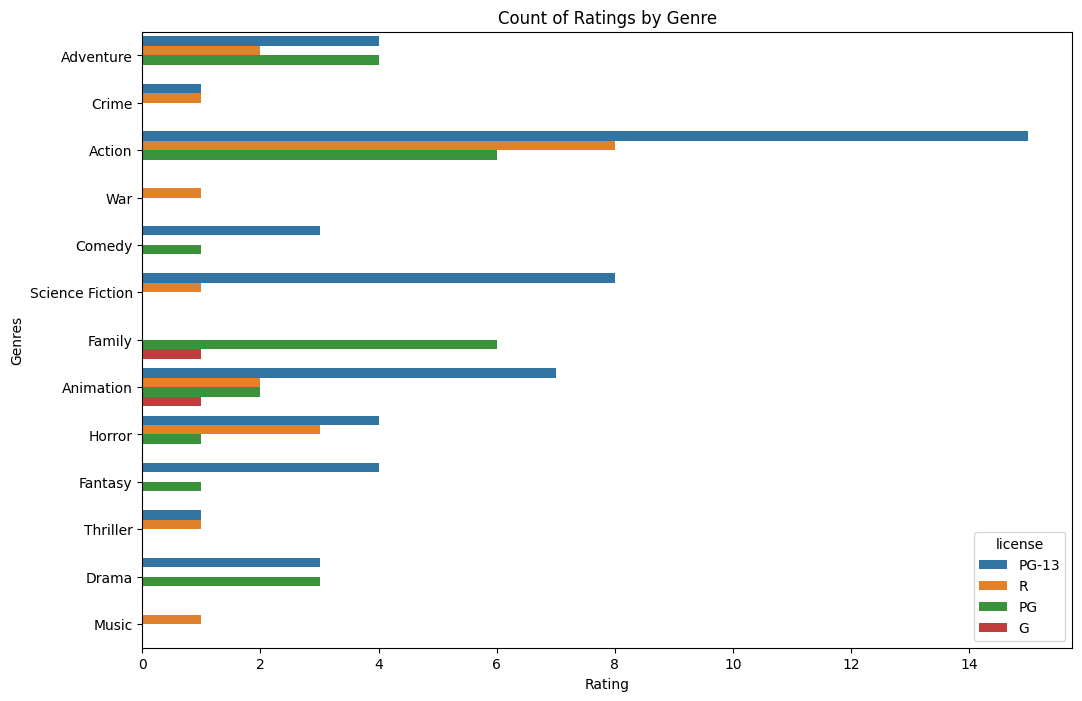

In [21]:
categorical_columns_filtered = categorical_columns[categorical_columns['license'] != 'unknown']
plt.figure(figsize=(12, 8))
sns.countplot(y='genres', hue='license', data=categorical_columns_filtered)
plt.title('Count of Ratings by Genre')
plt.ylabel('Genres')
plt.xlabel('Rating')
plt.show()